** 1. Entrada/salida de arrays NumPy **

- NumPy tiene una categoría de funciones para grabar y recuperar arrays
de disco: https://docs.scipy.org/doc/numpy/reference/routines.io.html
A partir del siguiente código:
- Guardar los arrays anteriores en formato específico de NumPy
comprimido y formato de texto (sin comprimir).
- Comparar las diferencias de espacio en disco desde el mismo Notebook,
y ver sus contenidos con el comando head del sistema operativo.
- Cargarlos de nuevo en memoria con nombres de variable diferentes.
- (opcional) Guardar los dos arrays en un solo fichero de texto y
recuperarlos de nuevo. Pista: utilizar tuplas.


In [12]:
import numpy as np
N = 10
a = np.random.uniform(size=N)
b = np.random.normal(size=N)

#Guardar en formato NumPy comprimido: 500 bytes
np.savez_compressed('arrays_ab.npz', a=a, b=b)

#Guardar en formato texto: un valor en cada línea. Ambos ficheros: 505 bytes
np.savetxt('a.txt', a, delimiter=',')
np.savetxt('b.txt', b, delimiter=',')

#Guardar ambos en forma de tupla: un array en cada línea. 505 bytes
np.savetxt('arrays_ab.txt', (a, b))

#Cargar en memoria
ars_npz = np.load('arrays_ab.npz')
aa = ars_npz['a']
bb = ars_npz['b']

print(aa)
print(bb)

ars_txt = np.loadtxt('arrays_ab.txt')
aaa = ars_txt[0]
bbb = ars_txt[1]
print(aaa)
print(bbb)

#Referencias
#http://stackoverflow.com/questions/9619199/best-way-to-preserve-numpy-arrays-on-disk
#http://stackoverflow.com/questions/17574976/storing-and-loading-numpy-arrays-as-files

[ 0.72026871  0.01193829  0.60428228  0.65781446  0.06151358  0.87855885
  0.01702293  0.0338917   0.88980576  0.54453785]
[ 1.3150678   1.60105015 -2.22401729  0.31140702  1.72474742  0.20993405
  0.59906299 -0.78241248  0.58422476 -0.8853239 ]
[ 0.72026871  0.01193829  0.60428228  0.65781446  0.06151358  0.87855885
  0.01702293  0.0338917   0.88980576  0.54453785]
[ 1.3150678   1.60105015 -2.22401729  0.31140702  1.72474742  0.20993405
  0.59906299 -0.78241248  0.58422476 -0.8853239 ]


** 2. Generación de datos - distribuciones de SciPy **

SciPy tiene un buen número de distribuciones de probabilidad conocidas
implementadas, continuas y discretas:
https://docs.scipy.org/doc/scipy/reference/stats.html
Queremos ahora estudiar la distribución de Pareto. Podemos ver su forma en
Wikipedia:
https://es.wikipedia.org/wiki/Distribución_de_Pareto
Se pide lo siguiente:
- Representar las funciones de densidad y de probabilidad similares a las
de Wikipedia.
- Hallar el percentil del 80% con k=1. Razonar sobre el Principio de
Pareto, se puede consultar aquí:
https://en.wikipedia.org/wiki/Pareto_principle


Percentil 80% k=1: 5.0
Percentil 20% k=1: 1.25


(0, 1.2)

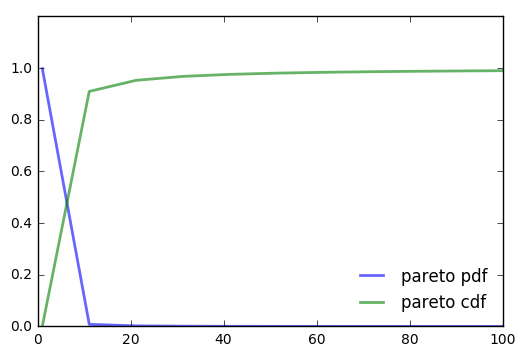

In [61]:
from scipy.stats import pareto
import matplotlib.pyplot as plt

#Plot en el notebook
%matplotlib inline

#Función de densidad de probabilidad
#Parámetro de forma (b en la ayuda de scipy, k en Wikipedia)
k = 1
x = np.linspace(pareto.ppf(0.001, k), pareto.ppf(0.999, k), 100)

#Probability Density Function
plt.plot(x, pareto.pdf(x, k), lw=2, alpha=0.6, label='pareto pdf')

#Frozen PDF
#rv = pareto(k)
#plt.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

#Cumulative Distribution Function
plt.plot(x, pareto.cdf(x, k, loc=0, scale=1), lw=2, alpha=0.6, label='pareto cdf')
plt.legend(loc='best', frameon=False)

print("Percentil 80% k=1: " + str(pareto.ppf(0.8, 1)))
print("Percentil 20% k=1: " + str(pareto.ppf(0.2, 1)))
#print("Percentil 99.9% k=1: " + str(pareto.ppf(0.999, 1))) -> 1000
#print("Percentil 95% k=1: " + str(pareto.ppf(0.96, 1))) -> 25
#Los PPF son los inversos de los valores CDF

axes = plt.gca()
axes.set_xlim([0,100])
axes.set_ylim([0,k+0.2])

#Mathematically, the 80/20 rule is roughly followed by a power law distribution (also known as a Pareto distribution)
#for a particular set of parameters, and many natural phenomena have been shown empirically to exhibit such a distribution.

#Referencias
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pareto.html#scipy.stats.pareto
